In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

#Loading the data
_URL = 'https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip'
#Unzipping the contents
path_to_zip = tf.keras.utils.get_file('Cat_Dog_data.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'Cat_Dog_data')

580509696/580495262 [==============================] - 11s 0us/step


In [2]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')
#Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cat')
#Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dog')
#Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cat')
#Directory with our test dog pictures 
test_dogs_dir = os.path.join(test_dir, 'dog')

In [3]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_test = len(os.listdir(test_cats_dir))
num_dogs_test = len(os.listdir(test_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_test = num_cats_test + num_dogs_test
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('total test cat images:', num_cats_test)
print('total test dog images:', num_dogs_test)
print("--")
print("Total training images:", total_train)
print("Total test images:", total_test)

total training cat images: 11250
total training dog images: 11250
total test cat images: 1250
total test dog images: 1250
--
Total training images: 22500
Total test images: 2500


In [4]:
#Variables for convenience
batch_size = 128
epochs = 15
IMG_WIDTH=128
IMG_HEIGHT=128
Image_Size=(IMG_WIDTH,IMG_HEIGHT)
Image_Channels=3


# Generator for our training data
train_image_generator = ImageDataGenerator(rescale=1./255)
# Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
val_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,directory=test_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')


Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


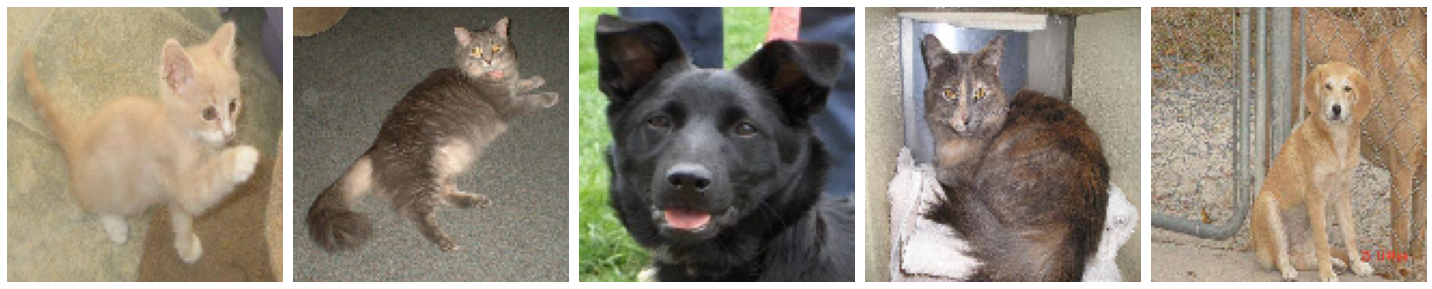

In [5]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMG_WIDTH,IMG_HEIGHT,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [7]:
epochs=10
history = model.fit(train_data_gen,
validation_data=val_data_gen,
epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


176/176 [==============================] - 99s 501ms/step - loss: 0.7447 - accuracy: 0.6791 - val_loss: 5.3228 - val_accuracy: 0.5000
Epoch 2/10
176/176 [==============================] - 81s 460ms/step - loss: 0.4967 - accuracy: 0.7630 - val_loss: 2.2112 - val_accuracy: 0.5004
Epoch 3/10
176/176 [==============================] - 85s 483ms/step - loss: 0.4067 - accuracy: 0.8140 - val_loss: 1.0481 - val_accuracy: 0.5816
Epoch 4/10
176/176 [==============================] - 81s 460ms/step - loss: 0.3631 - accuracy: 0.8367 - val_loss: 0.6308 - val_accuracy: 0.7296
Epoch 5/10
176/176 [==============================] - 81s 462ms/step - loss: 0.3246 - accuracy: 0.8597 - val_loss: 0.3881 - val_accuracy: 0.8200
Epoch 6/10
176/176 [==============================] - 82s 463ms/step - loss: 0.2825 - accuracy: 0.8799 - val_loss: 0.6942 - val_accuracy: 0.8252
Epoch 7/10
176/176 [==============================] - 81s 459ms/step - loss: 0.2464 - accuracy: 0.8968 - val_loss: 0.3698 - val_accuracy: 0.8

In [8]:
tf.keras.utils.plot_model

<function keras.utils.vis_utils.plot_model>

In [10]:
model.save("model1_catsVSdogs_10epoch.h5")

In [11]:
# evaluate model
_, acc = model.evaluate_generator(val_data_gen, steps=len(val_data_gen), verbose=0)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


> 84.400
